In [19]:
import pandas as pd
import yfinance as yf
import datetime as dt
import xlsxwriter
import math
import statistics
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from dash import callback_context
import numpy as np

from matplotlib import pyplot as plt
import random
import pandas_datareader as pdr
from matplotlib.pyplot import cm

In [2]:
def generate_df(ticker, start_date='2021-1-1', volatilityDays=50, calendarYear=365):
    df = yf.download(ticker, start_date, end = '2022-06-30')
    df = df.drop(["Open", "High", "Low", "Volume", "Close"], axis=1)
    df = df.reset_index()
    df["Px Change"] = None
    df["Volatility"] = None
    closes = df["Adj Close"].tolist()
    for i in range(1, len(df)):
        df.iat[i, 2] =round((math.log(df.iloc[i, 1] / df.iloc[i-1, 1])),
                            4)
        if i >= volatilityDays:
            df.iat[i, 3] = round((statistics.stdev(closes[i-50:i]) * math.sqrt(calendarYear)), 4) / 100
    df['Adj Close'] = df['Adj Close'].apply(lambda x: round(x, 2))
    volatilities = df["Volatility"][50:].tolist()
    meanVol = statistics.mean(volatilities)
    prices = df["Adj Close"].tolist()
    meanPrice = statistics.mean(prices)
    factor = meanPrice / meanVol
    df["Adj Vol"] = df["Volatility"] * factor
    for i in range(50):
        df.iat[i, 4] = None
    return df

In [3]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = data[0]
stocks = df['Symbol'].values.tolist()

In [4]:
stocks

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [7]:
def generate_dfs(stocks, calendarYear, volatilityDays, start_date):
    dfs = {}
    for stock in stocks:
        try:
            df = generate_df(stock, start_date, volatilityDays, calendarYear)
            dfs[stock] = df
        except:
            pass
    return dfs

In [8]:
dfs = generate_dfs(stocks[:35], 365, 50, dt.date(2015, 1, 1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
dfs["MMM"]

,Date,Adj Close,Px Change,Volatility,Adj Vol
0,2015-01-02,131.34,None,None,None
1,2015-01-05,128.38,-0.0228,None,None
2,2015-01-06,127.01,-0.0107,None,None
3,2015-01-07,127.93,0.0072,None,None
4,2015-01-08,131.00,0.0237,None,None
...,...,...,...,...,...
1881,2022-06-23,130.15,-0.0019,1.081288,171.722449
1882,2022-06-24,134.33,0.0316,1.145222,181.875991
1883,2022-06-27,132.80,-0.0115,1.174192,186.4768
1884,2022-06-28,130.33,-0.0188,1.210006,192.164524


In [313]:
mainWorkbook = xlsxwriter.Workbook('trial.xlsx')

In [11]:
def writeToWorksheet(df, wb, ticker, calenderYear=365,
                      volatilityDays=50):
    ws = wb.add_worksheet(ticker)
    ws.set_column(0, 0, 12)
    ws.set_column(1, 1, 10)
    ws.set_column(2, 4, 10)
    menu_format = wb.add_format({'bg_color' : '#004481',
                                 'font_color' : 'white',
                                 'font_name' : 'Arial',
                                 'font_size' : 10})
    menu_responses = wb.add_format({'font_name' : 'Arial',
                                    'font_size' : 10,
                                    'align' : 'right'})
    olive_background = wb.add_format({'font_name' : 'Arial',
                                      'font_size' : 10,
                                      'bg_color' : '#cabc96'})
    olive_background_pct = wb.add_format({'font_name' : 'Arial',
                                          'font_size' : 10,
                                          'bg_color' : '#cabc96',
                                          'num_format' : '0.00%'})
    grey_background = wb.add_format({'font_name' : 'Arial',
                                     'font_size' : 10,
                                     'bg_color' : '#eff1ef'})
    grey_background_num = wb.add_format({'font_name' : 'Arial',
                                         'font_size' : 10,
                                         'bg_color' : '#eff1ef',
                                         'num_format' : '0.00%'})
    blue_background = wb.add_format({'font_name' : 'Arial',
                                     'font_size' : 10,
                                     'bg_color' : '#baeafc'})
    menuWords = ["Source", "Ticker", "Calendar Year", "Volatility Days",
                 "Start Date", "Close", "Current", "Average", "Maximum",
                                                              "Minimum"]
    for i in range(len(menuWords)):
        ws.write(i, 0, menuWords[i], menu_format)
    ws.write(0, 1, "Yahoo", menu_responses)
    ws.write(1, 1, ticker, menu_responses)
    ws.write(2, 1, calenderYear, menu_responses)
    ws.write(3, 1, volatilityDays, menu_responses)
    ws.write(4, 1, df.iloc[0][0].strftime("%m/%d/%Y"), menu_responses)
    ws.write(10, 0, "Date", grey_background)
    ws.write(10, 1, "Adj Close", grey_background)
    ws.write(10, 2, "Px Change", grey_background)
    ws.write(10, 3, "Volatility", grey_background)
    ws.write(5, 1, df.iloc[len(df)-1][1], olive_background)
    ws.write(10, 4, "Adj Vol", grey_background)
    volatilities = (df["Volatility"].tolist())[volatilityDays:]
    if len(df) > volatilityDays:
        ws.write(6, 1, df.iloc[len(df)-1][3], olive_background_pct)
        ws.write(7, 1, statistics.mean(volatilities),
                 olive_background_pct)
        ws.write(8, 1, max(volatilities), olive_background_pct)
        ws.write(9, 1, min(volatilities), olive_background_pct)
    for i in range(len(df)):
        try:
            ws.write(i+11, 0, df.iloc[i][0].strftime("%m/%d/%Y"),
                     blue_background)
            ws.write(i+11, 1, df.iloc[i][1], blue_background)
            ws.write(i+11, 2, df.iloc[i][2], grey_background_num)
            ws.write(i+11, 3, df.iloc[i][3], grey_background_num)
            ws.write(i+11, 4, df.iloc[i][4], grey_background_num)
        except:
            pass
    chart = wb.add_chart({'type' : 'line'})
    numCells = len(df)
    chart.add_series({'values' : f'={ticker}!$B$12:$B${str(numCells + 11)}', 'name' : f'={ticker}!$B$11'})
    chart.add_series({'values' : f'={ticker}!$E${volatilityDays}:$E${str(numCells + 11)}', 'name' : f'={ticker}!$D$11'})
    ws.insert_chart('F11', chart)

In [315]:
for stock in stocks:
    writeToWorksheet(dfs[stock], mainWorkbook, stock)

In [316]:
mainWorkbook.close()

In [13]:
dfs["MMM"]["Volatility"][50:]

50      0.501881
51      0.501239
52      0.491812
53       0.46956
54      0.453973
          ...   
1881    1.081288
1882    1.145222
1883    1.174192
1884    1.210006
1885    1.262164
Name: Volatility, Length: 1836, dtype: object

In [318]:
volatilities = dfs["AMAM"]["Volatility"][50:].tolist()
meanVol = statistics.mean(volatilities)
prices = dfs["AMAM"]["Adj Close"].tolist()
meanPrice = statistics.mean(prices)
factor = meanPrice / meanVol
dfs["AMAM"]["Adj Vol"] = dfs["AMAM"]["Volatility"] * factor

In [319]:
dfs["AMAM"]["Adj Vol"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
255    1.879383
256    2.171699
257    2.409616
258    2.761507
259    3.019244
Name: Adj Vol, Length: 260, dtype: object

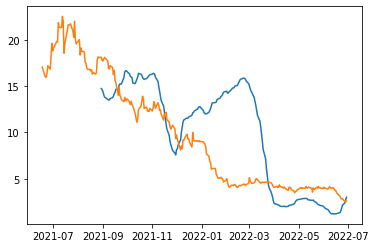

In [320]:
plt.plot(dfs["AMAM"]["Date"], dfs["AMAM"]["Adj Vol"])
plt.plot(dfs["AMAM"]["Date"], dfs["AMAM"]["Adj Close"])
plt.show()

In [14]:
def makeExcelSheets(fileName, companies, start, end):
    mainWorkbook = xlsxwriter.Workbook(fileName)
    for stock in companies:
        df = dfs[stock]
        df = df[df["Date"] > start]
        df = df[df["Date"] < end]
        writeToWorksheet(df, mainWorkbook, stock)
    mainWorkbook.close()


In [353]:
df1 = dfs["AAPL"]
df1 = df1[df1["Date"] > dt.datetime(2017, 1, 1)]

In [354]:
df1

,Date,Adj Close,Px Change,Volatility,Adj Vol
504,2017-01-03,27.26,0.0028,0.142102,14.786938
505,2017-01-04,27.23,-0.0011,0.141777,14.753119
506,2017-01-05,27.37,0.0051,0.141792,14.75468
507,2017-01-06,27.67,0.0111,0.141266,14.699945
508,2017-01-09,27.92,0.0091,0.141655,14.740424
...,...,...,...,...,...
1881,2022-06-23,138.27,0.0213,2.18082,226.933124
1882,2022-06-24,141.66,0.0242,2.16214,224.989309
1883,2022-06-27,141.66,0.0,2.1157,220.156827
1884,2022-06-28,137.44,-0.0302,2.043363,212.629538


In [31]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Automated Finance Tool", style={'text-align' : 'center'}),

    html.H5("Select Companies", style={'text-align' : 'left'}),

    dcc.Dropdown(id="slct_ticker",
                 options=[{'label':i, 'value': i} for i in stocks[:35]],
                 multi=True),

    html.Br(),

    html.H5("Select Date Range", style={'text-align' : 'left'}),

    dcc.DatePickerSingle(
            id='my-date-picker-single',
            min_date_allowed=dt.date(2000, 1, 1),
            max_date_allowed=dt.date(2022, 3, 1),
            initial_visible_month=dt.date(2009, 8, 5),
            date=dt.date(2017, 8, 25)
        ),

    html.Br(),

    dcc.DatePickerSingle(
                id='my-date-picker-single2',
                min_date_allowed=dt.date(2000, 1, 1),
                max_date_allowed=dt.date(2022, 3, 1),
                initial_visible_month=dt.date(2022, 6, 1),
                date=dt.date(2022, 6, 1)
            ),

    html.Br(),

    html.H5("Enter a filename (make sure to include 'xlsx')", style={'text-align' : 'left'}),

    dcc.Textarea(
        id='textarea-example',
        style={'width': '30%', 'height': 30}
    ),

    html.Br(),

    html.Button('Submit', id='button', n_clicks=0),
    html.Br(),

    html.Div(id='output_container', style={'whiteSpace': 'pre-line'})

])

@app.callback(
    [Output(component_id='output_container', component_property='children')],
    [Input('slct_ticker', 'value'),
     Input('my-date-picker-single', 'date'),
     Input('my-date-picker-single2' ,'date'),
     Input('textarea-example', 'value'),
     Input('button', 'n_clicks')]
)

def update(ticker_slctd, start_date, end_date, file_name, num_clicks):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    if 'button' in changed_id:
        makeExcelSheets(file_name, ticker_slctd, start_date, end_date)
        return ["Created file with name " + file_name]
    return [""]



SyntaxError: invalid syntax (575702912.py, line 2)

In [32]:
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/
